## Árvore de Decisão

##Importação de dados de custos médicos

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
dados = pd.read_csv(url)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##Preparando o conjunto de dados para modelagem

In [3]:
dados['smoker'] = dados ['smoker'].map({'yes':1, 'no':0})
dados['charges'] = dados ['charges']/1000
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


##Árvores de decisão

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

profundidade = 3

R=100

eqms_treino = []
eqms_teste = []

X = dados[['bmi']]
y= dados ['charges']

for i in range(R):
    Xtreino, Xteste, ytreino, yteste = train_test_split(X,y, test_size= 0.25)

    arvore= DecisionTreeRegressor(max_depth= profundidade)
    arvore.fit(Xtreino, ytreino)

    preditos_treino=arvore.predict(Xtreino)
    eqm_treino=mean_squared_error(preditos_treino, ytreino)
    eqms_treino.append(eqm_treino)

    preditos_teste=arvore.predict(Xteste)
    eqm_teste=mean_squared_error(preditos_teste, yteste)
    eqms_teste.append(eqm_teste)

print('O EQM DE TREINO FOI: {:.2f}'.format(np.mean(eqms_treino)))
print('O EQM DE TESTE FOI: {:.2f}'.format(np.mean(eqms_teste)))

O EQM DE TREINO FOI: 135.60
O EQM DE TESTE FOI: 148.92


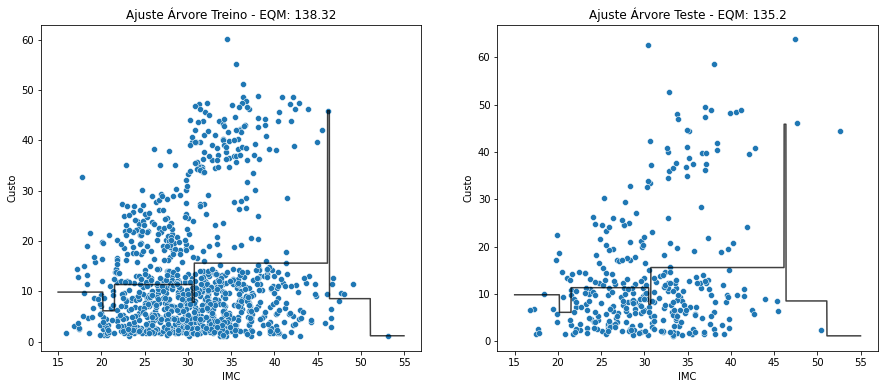

In [38]:
# Gráfico da Árvore com 1 variável

import matplotlib.pyplot as plt
import seaborn as sns

X = dados[['bmi']]
y= dados ['charges']

Xtreino, Xteste, ytreino, yteste = train_test_split(X,y, test_size= 0.25)

arvore= DecisionTreeRegressor(max_depth= profundidade)
arvore.fit(Xtreino, ytreino)

preditos_treino=arvore.predict(Xtreino)
preditos_teste=arvore.predict(Xteste)

import numpy as np

x=np.arange(15,55,0.01)
y=arvore.predict(pd.DataFrame({'bmi':x}))

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.scatterplot(x=Xtreino['bmi'], y = ytreino)
plt.plot(x,y,color='black',alpha=0.75)
plt.title('Ajuste Árvore Treino - EQM: '+str(round(eqm_treino,2)))
plt.xlabel('IMC')
plt.ylabel('Custo')


plt.subplot(1,2,2)
sns.scatterplot(x=Xteste['bmi'], y = yteste)
plt.plot(x,y,color='black',alpha=0.75)
plt.title('Ajuste Árvore Teste - EQM: '+str(round(eqm_teste,2)))
plt.xlabel('IMC')
plt.ylabel('Custo')

plt.show()



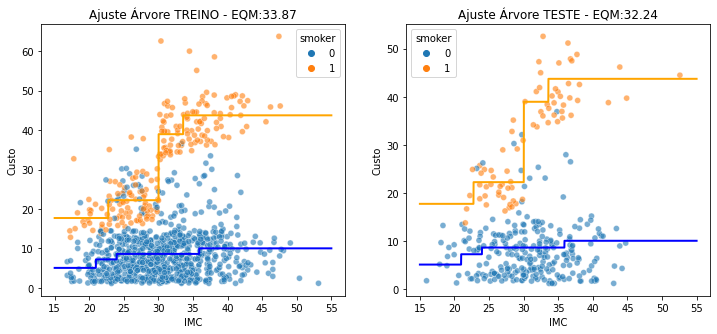

In [39]:
#Gráfico da árvore com 2 variáveis

X=dados[['bmi', 'smoker']]
y=dados['charges']

Xtreino, Xteste, ytreino, yteste = train_test_split(X,y, test_size= 0.25)

arvore=DecisionTreeRegressor(max_depth=profundidade)
arvore.fit(Xtreino,ytreino)

preditos_treino=arvore.predict(Xtreino)
preditos_teste=arvore.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

import numpy as np

x=np.arange(15,55,0.01)
v0=np.zeros(len(x))
v1=np.ones(len(x))

c0=pd.DataFrame([x,v0], index=['bmi', 'smoker']).T
c1=pd.DataFrame([x,v1], index=['bmi', 'smoker']).T

d0=arvore.predict(c0)
d1=arvore.predict(c1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x=Xtreino['bmi'], y=ytreino, hue=Xtreino['smoker'], alpha=0.6)
plt.plot(x,d0,'-', color='blue', linewidth = 2)
plt.plot(x,d1,'-', color='orange', linewidth = 2)
plt.title('Ajuste Árvore TREINO - EQM:' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')

plt.subplot(1,2,2)
sns.scatterplot(x=Xteste['bmi'], y=yteste, hue=Xteste['smoker'], alpha=0.6)
plt.plot(x,d0,'-', color='blue', linewidth = 2)
plt.plot(x,d1,'-', color='orange', linewidth = 2)
plt.title('Ajuste Árvore TESTE - EQM:' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')

plt.show()
                          

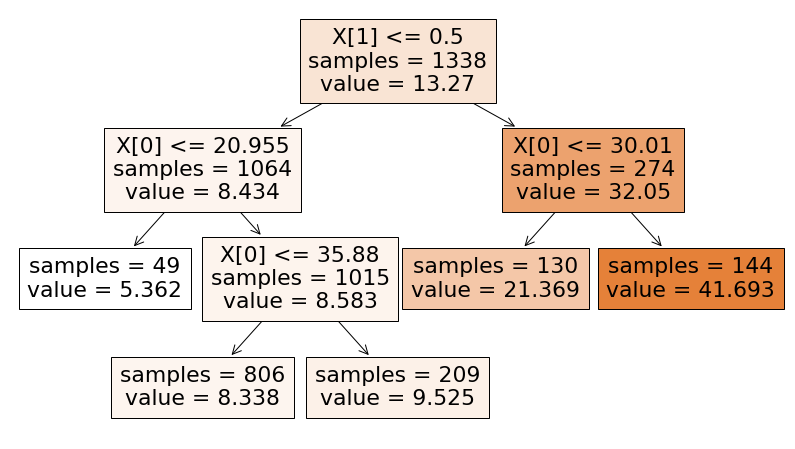

In [41]:
#Gráfico da Árvore

from sklearn.tree import plot_tree

X=dados[['bmi','smoker']]
y=dados['charges']

arvore = DecisionTreeRegressor(max_depth= 3, min_samples_split= 150 )
arvore.fit(X,y)

plt.figure(figsize=(14,8))
plot_tree(arvore, filled=True, proportion=False, impurity=False)
plt.show()

##Comparação de modelos

In [23]:
def HoldoutRepetido(modelo, replicas = 100, proporcao = 0.25):

    eqms_treino = []
    eqms_teste = []

    for i in range(replicas):
        Xtreino, Xteste, ytreino, yteste = train_test_split(X,y, test_size= 0.25)

        #Treinando o modelo
        reg = modelo
        reg.fit(Xtreino, ytreino)

        #Verificando o eqm no teste
        preditos_treino= reg.predict(Xtreino)
        eqm_treino = mean_squared_error(preditos_treino, ytreino)
        
        preditos_teste=reg.predict(Xteste)
        eqm_teste = mean_squared_error(preditos_teste, yteste)

        # Guardando o resultado
        eqms_treino.append(eqm_treino)
        eqms_teste.append(eqm_teste)
        
    res_treino = np.array(eqms_treino).mean().round(2)
    res_teste = np.array(eqms_teste).mean().round(2)

    print('EQM médio de TREINO: {}'.format(res_treino))
    print('EQM médio de TESTE: {}\n'.format(res_teste))

    return res_treino, res_teste 

In [24]:
from sklearn.neighbors import KNeighborsRegressor

HoldoutRepetido(modelo= KNeighborsRegressor())


EQM médio de TREINO: 31.53
EQM médio de TESTE: 46.61



(31.53, 46.61)

In [25]:
HoldoutRepetido(modelo= KNeighborsRegressor(20))

EQM médio de TREINO: 48.83
EQM médio de TESTE: 54.92



(48.83, 54.92)

In [26]:
HoldoutRepetido(modelo= DecisionTreeRegressor())

EQM médio de TREINO: 15.55
EQM médio de TESTE: 57.13



(15.55, 57.13)

In [43]:
from sklearn.linear_model import LinearRegression

X = dados[['bmi','smoker']]
y= dados ['charges']

modelos = [LinearRegression(),
           KNeighborsRegressor(n_neighbors=5),
           KNeighborsRegressor(n_neighbors=15),
           KNeighborsRegressor(n_neighbors=25),
           KNeighborsRegressor(n_neighbors=35),
           KNeighborsRegressor(n_neighbors=45),
           DecisionTreeRegressor(max_depth=1),
           DecisionTreeRegressor(max_depth=2),
           DecisionTreeRegressor(max_depth=3),
           DecisionTreeRegressor(max_depth=4),
           DecisionTreeRegressor(max_depth=5)]
           
                   

nomes = ['Regressão Linear', 
         'KNN-K = 5',
         'KNN-K = 15',
         'KNN-K = 25',
         'KNN-K = 35',
         'KNN-K = 45',
         'Árvore-prof = 1',
         'Árvore-prof = 2',
         'Árvore-prof = 3',
         'Árvore-prof = 4',
         'Árvore-prof = 5']     

treinos = []
testes=[]

for modelo in modelos:
    resultados = HoldoutRepetido(modelo)
    treinos.append(resultados[0])
    testes.append(resultados[1])

aux = {'EQM Treino': treinos, 'EQM Teste':testes}    
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by='EQM Teste')

EQM médio de TREINO: 50.06
EQM médio de TESTE: 50.51

EQM médio de TREINO: 31.35
EQM médio de TESTE: 47.35

EQM médio de TREINO: 43.73
EQM médio de TESTE: 50.4

EQM médio de TREINO: 54.0
EQM médio de TESTE: 60.11

EQM médio de TREINO: 67.82
EQM médio de TESTE: 71.5

EQM médio de TREINO: 80.03
EQM médio de TESTE: 85.38

EQM médio de TREINO: 55.67
EQM médio de TESTE: 56.05

EQM médio de TREINO: 34.09
EQM médio de TESTE: 35.36

EQM médio de TREINO: 33.14
EQM médio de TESTE: 34.73

EQM médio de TREINO: 32.28
EQM médio de TESTE: 35.86

EQM médio de TREINO: 30.88
EQM médio de TESTE: 37.4



,EQM Treino,EQM Teste
Árvore-prof = 3,33.14,34.73
Árvore-prof = 2,34.09,35.36
Árvore-prof = 4,32.28,35.86
Árvore-prof = 5,30.88,37.40
KNN-K = 5,31.35,47.35
KNN-K = 15,43.73,50.40
Regressão Linear,50.06,50.51
Árvore-prof = 1,55.67,56.05
KNN-K = 25,54.00,60.11
KNN-K = 35,67.82,71.50
